<a href="https://colab.research.google.com/github/ficorrea/data_science/blob/main/neural_net/learningPytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Baseado em:
https://medium.com/turing-talks/construindo-uma-rede-neural-do-zero-pytorch-671ee06fbbe1

Definições:
https://insightlab.ufc.br/tutorial-pytorch-um-guia-rapido-para-voce-entender-agora-os-fundamentos-do-pytorch

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from time import time

import torch
from torch import nn, optim

# Possui uma série de funções que podem ser aplicadas 
import torch.nn.functional as F

# The torchvision package consists of popular datasets, model architectures, and common image transformations for computer vision.
import torchvision
from torchvision import datasets, transforms

In [ ]:
from torch._C import dtype
# Sobre tensores
# A torch.Tensor is a multi-dimensional matrix containing elements of a single data type.
# https://pytorch.org/docs/stable/tensors.html

from sys import getsizeof
t1 = torch.zeros(size=[3, 4], dtype=torch.int8)
t2 = torch.rand(size=[5, 3])
print(t1)
print(getsizeof(t1))

print(t2)
print(getsizeof(t2))

tensor([[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]], dtype=torch.int8)
88
tensor([[0.5884, 0.6419, 0.4792],
        [0.1465, 0.6007, 0.2118],
        [0.6263, 0.2358, 0.5522],
        [0.6153, 0.2855, 0.1792],
        [0.7454, 0.0933, 0.7030]])
88


In [ ]:
# Dataset
# './MNIST_data/' é o diretório onde se encontra o dataset
# https://pytorch.org/vision/stable/datasets.html
data = datasets.MNIST('./MNIST_data/', download=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST_data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST_data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST_data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST_data/MNIST/raw



In [ ]:
# Matriz com várias imagens
data.data[0]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
          18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

In [ ]:
# Load do dataset

# definindo a conversão de imagem para tensor
tr = transforms.ToTensor()

# Carrega a parte de treino do dataset
trainset = datasets.MNIST('./MNIST_data/', download=True, train=True, transform=tr)
# Cria um buffer para pegar os dados por partes
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True) 

# Carrega a parte de validação do dataset
valset = datasets.MNIST('./MNIST_data/', download=True, train=False, transform=tr)
# Cria um buffer para pegar os dados por partes
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

In [ ]:
trainset.data[0]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
          18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

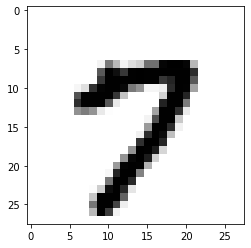

In [ ]:
dataiter = iter(trainloader)
imagens, etiquetas = dataiter.next()
# Representação da imagem
print(imagens[0], etiquetas[0])

# Dimensões
print(imagens[0].shape, etiquetas[0].shape)
# Etiquetas não tem dimensão por ser escalar.
# A primeira dimensão é o número de canais da nossa imagem. 
# Como é uma imagem preto e branco, possui apenas um, que diz respeito a intensidade do preto em cada pixel. 
# Imagens coloridas costumam ter 3 canais (vermelho, azul e verde).
# As duas ultimas dimensões representam a quantidade de pixels, nesse caso 28 x 28 = 784 pixels.

# Imagem
plt.imshow(imagens[0].numpy().squeeze(), cmap='gray_r');

In [ ]:
# O log_softmax funciona como se calculando linhas ou colunas
# Dimensão 0 número de batches no exemplo esse número é igual a 3
# Dimensão 1 número de features
# O número de dimensões sempre varia de -2 a 1
# https://discuss.pytorch.org/t/dimension-for-logsoftmax/49042/6

input = torch.randn(3, 2)
print(input)
for d in range(-2, 2):
    print(d)
    outputd = F.log_softmax(input, dim=d)
    print(outputd.sum(d))

tensor([[-0.3367, -0.0108],
        [ 0.5635,  0.6174],
        [ 2.4120, -0.9130]])
-2
tensor([-5.1974, -3.8375])
-1
tensor([-1.4127, -1.3870, -3.3957])
0
tensor([-5.1974, -3.8375])
1
tensor([-1.4127, -1.3870, -3.3957])


In [ ]:
# Definição do modelo
class Modelo(nn.Module):
    def __init__(self):
        super(Modelo, self).__init__()
        self.cmd1 = nn.Linear(28*28, 128)
        self.cmd2 = nn.Linear(128, 10)
    
    def forward(self, dt):
        dt = F.relu(self.cmd1(dt))
        dt = F.relu(self.cmd2(dt))
        return F.log_softmax(dt, dim=1)

class Modelo2(nn.Module):
    def __init__(self):
        super(Modelo2, self).__init__()
        self.cmd1 = nn.Linear(28*28, 256)
        self.cmd2 = nn.Linear(256, 128)
        self.cmd3 = nn.Linear(128, 64)
        self.cmd4 = nn.Linear(64, 10)
    
    def forward(self, dt):
        dt = F.relu(self.cmd1(dt))
        dt = F.celu(self.cmd2(dt))
        dt = F.selu(self.cmd3(dt))
        dt = F.rrelu(self.cmd4(dt))
        return F.log_softmax(dt, dim=1)

In [ ]:
# Entendendo .view do pytorch, funciona como reshape no numpy
input = torch.randn(2, 4)
print(input)
input.view(8, 1)

tensor([[-1.0359, -0.8615,  1.1126,  0.9063],
        [-1.3237,  0.3263, -0.0097,  1.1923]])


tensor([[-1.0359],
        [-0.8615],
        [ 1.1126],
        [ 0.9063],
        [-1.3237],
        [ 0.3263],
        [-0.0097],
        [ 1.1923]])

In [ ]:
# Função para treino
def treino(modelo, xtrain):
    lr, mmtm, epochs = 0.01, 0.6, 30
    otm = optim.SGD(modelo.parameters(), lr=lr, momentum=mmtm)
    
    # Criterio para cálculo da perda
    calc_loss = nn.NLLLoss()

    modelo.train()

    for epc in range(epochs):
        acc_loss = 0

        for imagens, etiquetas in xtrain:
            
            # convertendo as imagens para  "vetores" de 28*28 casas para ficarem compatíveis com a camada de entrada
            imagens = imagens.view(imagens.shape[0], -1)
            
            # zera os gradientes pra não sofrer interferência entre as sequências
            otm.zero_grad()
            
            # colocando os dados no modelo
            output = modelo(imagens)
            
            # calculando a perda da epoch em questão
            instant_loss = calc_loss(output, etiquetas)

            # back propagation a partir da perda
            instant_loss.backward()

            # update do otimizador (pesos e bias)
            otm.step()

            # update do valor de loss
            acc_loss += instant_loss.item()
        
        else:
            print("Epoch {} - Perda resultante: {}".format(epc+1, acc_loss/len(xtrain)))

In [ ]:
# Treinando o modelo
model = Modelo()
treino(model, trainloader)

Epoch 1 - Perda resultante: 1.1203027442256526
Epoch 2 - Perda resultante: 0.6016238142114713
Epoch 3 - Perda resultante: 0.5221327222200599
Epoch 4 - Perda resultante: 0.4856782118235824
Epoch 5 - Perda resultante: 0.45951974428475284
Epoch 6 - Perda resultante: 0.4396406916190566
Epoch 7 - Perda resultante: 0.42355116111224395
Epoch 8 - Perda resultante: 0.41040790407483513
Epoch 9 - Perda resultante: 0.39839638660806836
Epoch 10 - Perda resultante: 0.38849970437030296
Epoch 11 - Perda resultante: 0.3791309216621715
Epoch 12 - Perda resultante: 0.37085154746323507
Epoch 13 - Perda resultante: 0.3636565642602154
Epoch 14 - Perda resultante: 0.35710224278096453
Epoch 15 - Perda resultante: 0.35116008262453813
Epoch 16 - Perda resultante: 0.34576951424037217
Epoch 17 - Perda resultante: 0.34070670636478007
Epoch 18 - Perda resultante: 0.33618229597425664
Epoch 19 - Perda resultante: 0.33199527877162516
Epoch 20 - Perda resultante: 0.32794816915922836
Epoch 21 - Perda resultante: 0.32413

In [ ]:
model2 = Modelo2()
treino(model2, trainloader)

Epoch 1 - Perda resultante: 1.0002381674675291
Epoch 2 - Perda resultante: 0.32262751140764784
Epoch 3 - Perda resultante: 0.24382178049717249
Epoch 4 - Perda resultante: 0.18879565809454238
Epoch 5 - Perda resultante: 0.1510675937405972
Epoch 6 - Perda resultante: 0.12621116722578496
Epoch 7 - Perda resultante: 0.10727587152621958
Epoch 8 - Perda resultante: 0.09288029856125969
Epoch 9 - Perda resultante: 0.08121949909820851
Epoch 10 - Perda resultante: 0.07068934645066892
Epoch 11 - Perda resultante: 0.06287822726992831
Epoch 12 - Perda resultante: 0.05556932674484578
Epoch 13 - Perda resultante: 0.04918712674940962
Epoch 14 - Perda resultante: 0.04455494638884873
Epoch 15 - Perda resultante: 0.039385106610154104
Epoch 16 - Perda resultante: 0.034552462190500836
Epoch 17 - Perda resultante: 0.03065151467619996
Epoch 18 - Perda resultante: 0.027440227811653683
Epoch 19 - Perda resultante: 0.024250701552620338
Epoch 20 - Perda resultante: 0.021276970440869344
Epoch 21 - Perda resultant

### Analisando o predict do modelo

In [ ]:
tt = iter(valloader).next()

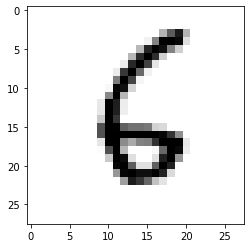

In [ ]:
plt.imshow(tt[0][0].numpy().squeeze(), cmap='gray_r');

In [ ]:
tt[1][0]

tensor(6)

In [ ]:
img = tt[0][0].view(1, 784)
model(img)

tensor([[-1.0530e+01, -1.2044e+01, -8.1378e+00, -1.2044e+01, -8.6462e+00,
         -4.8141e+00, -8.7608e-03, -1.2044e+01, -9.3179e+00, -1.2044e+01]],
       grad_fn=<LogSoftmaxBackward0>)

In [ ]:
torch.exp(model(img))

tensor([[2.6727e-05, 5.8806e-06, 2.9227e-04, 5.8806e-06, 1.7580e-04, 8.1144e-03,
         9.9128e-01, 5.8806e-06, 8.9799e-05, 5.8806e-06]],
       grad_fn=<ExpBackward0>)

In [ ]:
res = list(torch.exp(model(img)).detach().numpy()[0])
res.index(max(res))

6

In [ ]:
def validacao(modelo, xval):
    items, corrects = 0, 0
    for imagens, etiquetas in xval:
        for i in range(len(etiquetas)):
            img = imagens[i].view(1, 784)
            res = list(torch.exp(modelo(img)).detach().numpy()[0])
            pred = res.index(max(res))
            if pred == etiquetas[i]:
                corrects += 1
            items += 1
    print(f'Total de items validados: {items}')
    print(f'Acurácia: {corrects / items * 100}%')

In [ ]:
validacao(model, valloader)

Total de items validados: 10000
Acurácia: 97.00999999999999%


In [ ]:
validacao(model2, valloader)

Total de items validados: 10000
Acurácia: 97.82%
